# Proyecto final: módulo de deep learning

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Descarga de datos e imágenes

In [81]:
import cv2
import numpy
import pandas
import imageio.v3 as io
import matplotlib.pyplot as plt

from tqdm import tqdm

from typing import Optional, Union

In [82]:
data = pandas.read_csv("/content/drive/MyDrive/keepcoding_DL/data_KC.csv", sep = ';')
images = numpy.load("/content/drive/MyDrive/keepcoding_DL/images_KC.npy")
data.shape, images.shape

((2135, 30), (2135, 224, 224, 3))

In [83]:
data.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,Price
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0,150.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0
2,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0,750.0
3,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,85.0
4,11825529,4.418841,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,...,-118.462821,Beach Town Studio and Parking!!!11h,NaN,15,97.0,https://a0.muscache.com/im/pictures/4c920c60-4...,90292,1.0,1.0,83.0


In [84]:
data = data.dropna(subset=['log_price'])

In [85]:
# Convertimos los logs de precios en precios
data["Price"] = numpy.exp(data["log_price"])

In [86]:
# ¿De qué variables disponemos?
data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'Price'],
      dtype='object')

In [87]:
muestra_i = 0
print(data.iloc[muestra_i])

id                                                                  6901257
log_price                                                          5.010635
property_type                                                     Apartment
room_type                                                   Entire home/apt
amenities                 {"Wireless Internet","Air conditioning",Kitche...
accommodates                                                              3
bathrooms                                                               1.0
bed_type                                                           Real Bed
cancellation_policy                                                  strict
cleaning_fee                                                           True
city                                                                    NYC
description               Beautiful, sunlit brownstone 1-bedroom in the ...
first_review                                                     2016-06-18
host_has_pro

In [88]:
# IMPORTAMOS LAS LIBRERIAS
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
import time
import sys
import keras
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import VGG16, ResNet50

In [90]:
# DIVIDIMOS LOS DATOS EN TRAIN, VALIDATION Y TEST

y_completo = data['Price']

x_train, x_test, y_train, y_test = train_test_split(data, y_completo,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.15,
                                                  random_state=42,
                                                  shuffle=True)

print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(1360, 30) (241, 30) (534, 30)
(1360,) (241,) (534,)


In [91]:
# ALMACENAMOS LOS INDICES
index_train = x_train.index
index_val = x_val.index
index_test = x_test.index

In [92]:
# Guardamos los datasets originales en ficheros por separado

x_train.to_csv('/content/drive/MyDrive/keepcoding_DL/x_train.csv', sep=';', index=False)
x_test.to_csv('/content/drive/MyDrive/keepcoding_DL/x_test.csv', sep=';', index=False)
x_val.to_csv('/content/drive/MyDrive/keepcoding_DL/x_val.csv', sep=';', index=False)

np.save('/content/drive/MyDrive/keepcoding_DL/index_train.npy', index_train)
np.save('/content/drive/MyDrive/keepcoding_DL/index_val.npy', index_val)
np.save('/content/drive/MyDrive/keepcoding_DL/index_test.npy', index_test)

# **REGRESION DATASET**

In [93]:
# Vemos un poco de informacion de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2135 non-null   int64  
 1   log_price               2135 non-null   float64
 2   property_type           2135 non-null   object 
 3   room_type               2135 non-null   object 
 4   amenities               2135 non-null   object 
 5   accommodates            2135 non-null   int64  
 6   bathrooms               2128 non-null   float64
 7   bed_type                2135 non-null   object 
 8   cancellation_policy     2135 non-null   object 
 9   cleaning_fee            2135 non-null   bool   
 10  city                    2135 non-null   object 
 11  description             2135 non-null   object 
 12  first_review            1610 non-null   object 
 13  host_has_profile_pic    2125 non-null   object 
 14  host_identity_verified  2125 non-null   

### Variables numericas

In [94]:
# Variables numericas que consideramos mas relevantes

numerical_cols = ['accommodates',
                  'bathrooms',
                  'bedrooms',
                  'beds',
                  'number_of_reviews',
                  'review_scores_rating']

data[numerical_cols] = data[numerical_cols].fillna(0)
data[numerical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accommodates          2135 non-null   int64  
 1   bathrooms             2135 non-null   float64
 2   bedrooms              2135 non-null   float64
 3   beds                  2135 non-null   float64
 4   number_of_reviews     2135 non-null   int64  
 5   review_scores_rating  2135 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 100.2 KB


In [95]:
# Normalizamos con los datos de train
scaler = StandardScaler().fit(x_train[numerical_cols])

x_train_scaled = pd.DataFrame(scaler.transform(x_train[numerical_cols]), columns=numerical_cols)
x_val_scaled = pd.DataFrame(scaler.transform(x_val[numerical_cols]), columns=numerical_cols)
x_test_scaled = pd.DataFrame(scaler.transform(x_test[numerical_cols]), columns=numerical_cols)

In [96]:
# Concatenamos los distintos df
numerical_x = pd.concat([x_train_scaled, x_val_scaled, x_test_scaled], axis=0)
numerical_x.index = data.index
numerical_x.head()

,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating
0,-0.495897,-0.402629,-0.266507,-0.545069,-0.532125,NaN
1,-0.495897,-0.402629,-1.509289,-0.545069,-0.218531,-0.650593
2,-0.495897,-0.402629,-0.266507,-0.545069,0.323132,0.576169
3,0.470321,-0.402629,0.976276,0.284756,-0.532125,NaN
4,0.470321,-0.402629,0.976276,0.284756,-0.532125,NaN


### Variables categoricas

In [97]:
# Al haber pocos registros con los valores super_strict los vamos a considerar como si tambien fuesen strict.
data['cancellation_policy'] = data['cancellation_policy'].replace({'super_strict_30':'strict', 'super_strict_60':'strict'})
unicos = data['cancellation_policy'].unique()
unicos

array(['strict', 'flexible', 'moderate'], dtype=object)

In [98]:
# Codificamos las variables categoricas que consideramos mas importantes
property_type = pandas.get_dummies(data[['property_type']], prefix='property_type')
room_type = pandas.get_dummies(data[['room_type']], prefix='room_type')
cancellation_policy = pandas.get_dummies(data['cancellation_policy'], prefix='cancellation_policy')

# Unimos en el mismo df
categorical_x = pandas.concat([property_type, room_type, cancellation_policy], axis=1, join='inner')
categorical_x.head()

,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Camper/RV,property_type_Castle,property_type_Condominium,property_type_Dorm,property_type_Guest suite,...,property_type_Serviced apartment,property_type_Timeshare,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


### Juntamos los df de las variables numericas y categoricas

In [99]:
data = pandas.concat([numerical_x, categorical_x], axis=1)
data

,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,...,property_type_Serviced apartment,property_type_Timeshare,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,-0.495897,-0.402629,-0.266507,-0.545069,-0.532125,NaN,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,-0.495897,-0.402629,-1.509289,-0.545069,-0.218531,-0.650593,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,-0.495897,-0.402629,-0.266507,-0.545069,0.323132,0.576169,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,0.470321,-0.402629,0.976276,0.284756,-0.532125,NaN,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,0.470321,-0.402629,0.976276,0.284756,-0.532125,NaN,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,-0.495897,-0.402629,-0.266507,-0.545069,-0.332565,-0.873640,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2131,0.470321,-0.402629,0.976276,0.284756,-0.247039,-0.650593,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2132,-0.495897,-0.402629,-1.509289,-0.545069,-0.361074,0.687693,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
2133,-0.495897,-0.402629,-1.509289,0.284756,0.722252,0.018550,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   accommodates                      2135 non-null   float64
 1   bathrooms                         2128 non-null   float64
 2   bedrooms                          2131 non-null   float64
 3   beds                              2132 non-null   float64
 4   number_of_reviews                 2135 non-null   float64
 5   review_scores_rating              1589 non-null   float64
 6   property_type_Apartment           2135 non-null   bool   
 7   property_type_Bed & Breakfast     2135 non-null   bool   
 8   property_type_Boat                2135 non-null   bool   
 9   property_type_Boutique hotel      2135 non-null   bool   
 10  property_type_Bungalow            2135 non-null   bool   
 11  property_type_Camper/RV           2135 non-null   bool   
 12  proper

In [101]:
# Los pocos NaN que hay los vamos a rellenar con 0
data = data.fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   accommodates                      2135 non-null   float64
 1   bathrooms                         2135 non-null   float64
 2   bedrooms                          2135 non-null   float64
 3   beds                              2135 non-null   float64
 4   number_of_reviews                 2135 non-null   float64
 5   review_scores_rating              2135 non-null   float64
 6   property_type_Apartment           2135 non-null   bool   
 7   property_type_Bed & Breakfast     2135 non-null   bool   
 8   property_type_Boat                2135 non-null   bool   
 9   property_type_Boutique hotel      2135 non-null   bool   
 10  property_type_Bungalow            2135 non-null   bool   
 11  property_type_Camper/RV           2135 non-null   bool   
 12  proper

# Regresion

In [102]:
# Vamos a normalizar entre 0 y 1
cs = MinMaxScaler()
cols = data.columns

train_X = pandas.DataFrame(cs.fit_transform(data.loc[index_train]),columns=cols)
val_X = pandas.DataFrame(cs.transform(data.loc[index_val]),columns=cols)
test_X = pandas.DataFrame(cs.transform(data.loc[index_test]),columns=cols)

In [103]:
# Vamos a normalizar entre -1 y 1

cs = MinMaxScaler()
y_train_norm = cs.fit_transform(y_train.values.reshape(-1, 1))
y_val_norm = cs.transform(y_val.values.reshape(-1, 1))
y_test_norm = cs.transform(y_test.values.reshape(-1, 1))

y_train_norm.dtype, y_val_norm.dtype, y_test_norm.dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

In [104]:
model = Sequential()
model.add(Dense(256, input_shape=(data.shape[1],), activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="linear"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               8448      
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 8)                 1032      
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 42385 (165.57 KB)
Trainable params: 42385 (165.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/250
43/43 [==============================] - 1s 8ms/step - loss: 0.0109 - mse: 0.0109 - mae: 0.0720 - val_loss: 0.0117 - val_mse: 0.0117 - val_mae: 0.0689
Epoch 2/250
43/43 [==============================] - 0s 5ms/step - loss: 0.0098 - mse: 0.0098 - mae: 0.0636 - val_loss: 0.0112 - val_mse: 0.0112 - val_mae: 0.0634
Epoch 3/250
43/43 [==============================] - 0s 5ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0591 - val_loss: 0.0109 - val_mse: 0.0109 - val_mae: 0.0598
Epoch 4/250
43/43 [==============================] - 0s 4ms/step - loss: 0.0090 - mse: 0.0090 - mae: 0.0561 - val_loss: 0.0108 - val_mse: 0.0108 - val_mae: 0.0576
Epoch 5/250
43/43 [==============================] - 0s 4ms/step - loss: 0.0088 - mse: 0.0088 - mae: 0.0543 - val_loss: 0.0107 - val_mse: 0.0107 - val_mae: 0.0562
Epoch 6/250
43/43 [==============================] - 0s 5ms/step - loss: 0.0087 - mse: 0.0087 - mae: 0.0530 - val_loss: 0.0106 - val_mse: 0.0106 - val_mae: 0.0553
Epoch 7/250
43/43 [===

[]

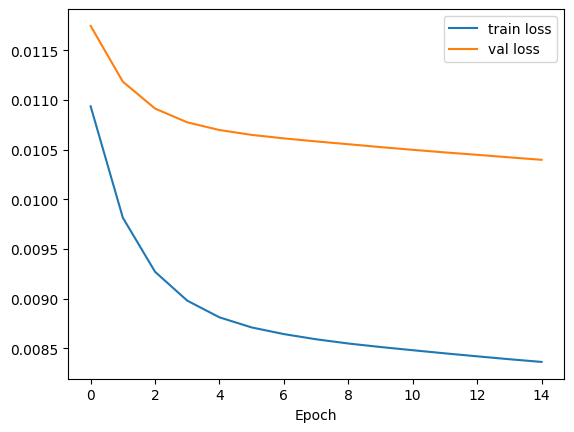

In [105]:
# Establecemos una semilla
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Parametros de entrenamiento
epochs = 250
batch_size = 32
learning_rate = 0.001
lr_decay = 1e-3

# Callback earlyStopping
earlyStopping_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10)

# Implementar un callback para el decay:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=learning_rate,
    decay_steps=1000,
    decay_rate=lr_decay)

model.compile(loss="mean_squared_error", optimizer=SGD(learning_rate=lr_schedule),  metrics=["mse", "mae"])


# Modelo secuencial
H = model.fit(x=train_X,
              y=y_train_norm,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(val_X, y_val_norm),
              shuffle=True,
              verbose=1,
              callbacks = [earlyStopping_callback])

# Comprobamos curvas de aprendizaje
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.plot()

# **REGRESION CON IMAGENES**

In [106]:
# Convertimos a índices de pandas
index_train = pd.Index(index_train)
index_val  = pd.Index(index_val)
index_test = pd.Index(index_test)

# Verificar las formas de los datos
print(images.shape, index_train.shape, index_val.shape, index_test.shape)

(2135, 224, 224, 3) (1360,) (241,) (534,)


### Preparamos el modelo preentrenado

In [107]:
input_shape = images[0].shape
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [108]:
# Parámetros
dropout = 0.5
output = y_train_norm.shape[1]

# Construir el modelo personalizado
base_output = base_model.layers[-1].output
x = GlobalAveragePooling2D()(base_output)
x = Dense(256, activation='relu', name='dense_layer_1')(x)
x = Dropout(dropout)(x)
x = Dense(output, activation='linear', name='output_layer')(x)

# Definir el modelo final
model2D = Model(inputs=base_model.input, outputs=x)
model2D.compile(optimizer='adam', loss='mean_squared_error')
model2D.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Epoch 1/5
43/43 [==============================] - 20s 424ms/step - loss: 0.2459 - mse: 0.2459 - mae: 0.3814 - val_loss: 0.0182 - val_mse: 0.0182 - val_mae: 0.0823
Epoch 2/5
43/43 [==============================] - 18s 416ms/step - loss: 0.0733 - mse: 0.0733 - mae: 0.2085 - val_loss: 0.0136 - val_mse: 0.0136 - val_mae: 0.0666
Epoch 3/5
43/43 [==============================] - 18s 413ms/step - loss: 0.0231 - mse: 0.0231 - mae: 0.1116 - val_loss: 0.0122 - val_mse: 0.0122 - val_mae: 0.0605
Epoch 4/5
43/43 [==============================] - 18s 415ms/step - loss: 0.0153 - mse: 0.0153 - mae: 0.0830 - val_loss: 0.0117 - val_mse: 0.0117 - val_mae: 0.0574
Epoch 5/5
43/43 [==============================] - 18s 428ms/step - loss: 0.0126 - mse: 0.0126 - mae: 0.0740 - val_loss: 0.0116 - val_mse: 0.0116 - val_mae: 0.0562


[]

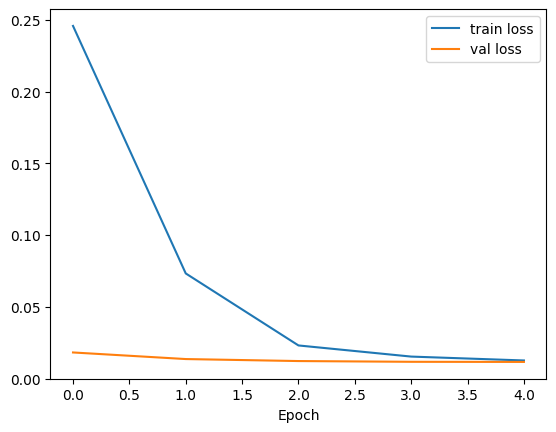

In [109]:
# Establecemos una semilla
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Parametros de entrenamiento
epochs = 5
batch_size = 32
learning_rate = 0.001
lr_decay = 1e-3

# Callback earlyStopping
earlyStopping_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10)

# Implementar un callback para el decay:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=learning_rate,
    decay_steps=1000,
    decay_rate=lr_decay)

model2D.compile(loss="mean_squared_error", optimizer=SGD(learning_rate=lr_schedule),  metrics=["mse", "mae"])

# Modelo secuencial
H = model2D.fit(x=images[index_train],
              y=y_train_norm,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(images[index_val], y_val_norm),
              shuffle=True,
              verbose=1,
              callbacks = [earlyStopping_callback])

# Comprobamos curvas de aprendizaje
plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.plot()

# **LATE FUSION**

In [110]:
# Calcular predicciones del modelo 1D
late_fusion_features_train = model.predict(train_X)
late_fusion_features_val = model.predict(val_X)
late_fusion_features_test = model.predict(test_X)
print(late_fusion_features_train.shape)

# Calcular predicciones del modelo 2D
late_fusion_features_train_2d = model2D.predict(images[index_train])
late_fusion_features_val_2d = model2D.predict(images[index_val])
late_fusion_features_test_2d = model2D.predict(images[index_test])
print(late_fusion_features_train_2d.shape)

17/17 [==============================] - 0s 2ms/step
(1360, 1)
17/17 [==============================] - 2s 122ms/step
(1360, 1)


In [111]:
# Unimos los valores con las predicciones
union_late_fusion_train = np.concatenate((late_fusion_features_train, late_fusion_features_train_2d), axis=1)
union_late_fusion_val = np.concatenate((late_fusion_features_val, late_fusion_features_val_2d), axis=1)
union_late_fusion_test = np.concatenate((late_fusion_features_test, late_fusion_features_test_2d), axis=1)
print(late_fusion_features_train.shape)
print(late_fusion_features_val.shape)
print(late_fusion_features_test.shape)

(1360, 1)
(241, 1)
(534, 1)


In [112]:
late_fusion_model = LinearRegression()
late_fusion_model.fit(union_late_fusion_train, y_train_norm)

y_pred_train = late_fusion_model.predict(union_late_fusion_train)
y_pred_val = late_fusion_model.predict(union_late_fusion_val)
y_pred_test = late_fusion_model.predict(union_late_fusion_test)
print("R2: ", r2_score(y_test_norm, y_pred_test))
print(y_test[0:5])
print(y_pred_test[0:5])

R2:  0.12005486334191162
1429    140.0
231      85.0
2019    135.0
297      80.0
2053    200.0
Name: Price, dtype: float64
[[0.07507981]
 [0.0675181 ]
 [0.12318911]
 [0.05163892]
 [0.11112646]]


# **EARLY FUSION**

In [113]:
# Combinación de datos de entrenamiento y validación en 1D
early_combined_1d_data = np.concatenate((train_X, val_X), axis=0)
early_combined_1d_data.shape

# Extracción de características en 2D definiendo un nuevo modelo
conv_output_layer = model2D.layers[-4].output
features_model = Model(inputs=model2D.input, outputs=conv_output_layer)
features_model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [114]:
# Obtención de características para las imágenes de train/val/test
train_features_2d = features_model.predict(images[index_train])
val_features_2d = features_model.predict(images[index_val])
test_features_2d = features_model.predict(images[index_test])

train_features_2d.shape, val_features_2d.shape, test_features_2d.shape

17/17 [==============================] - 2s 115ms/step


((1360, 512), (241, 512), (534, 512))

In [115]:
# Concatenamos los atributos de entrada
early_fusion_features_train = np.concatenate((train_X, train_features_2d), axis=1)
early_fusion_features_val = np.concatenate((val_X, val_features_2d), axis=1)
early_fusion_features_test = np.concatenate((test_X, test_features_2d), axis=1)
print(early_fusion_features_train.shape)
print(early_fusion_features_val.shape)
print(early_fusion_features_test.shape)

(1360, 544)
(241, 544)
(534, 544)


In [116]:
late_fusion_model = LinearRegression()
late_fusion_model.fit(early_fusion_features_train, y_train_norm)

y_pred_train = late_fusion_model.predict(early_fusion_features_train)
y_pred_val = late_fusion_model.predict(early_fusion_features_val)
y_pred_test = late_fusion_model.predict(early_fusion_features_test)
print("R2: ", r2_score(y_test_norm, y_pred_test))
print(y_test[0:5])
print(y_pred_test[0:5])

R2:  -6.285610549247712e+24
1429    140.0
231      85.0
2019    135.0
297      80.0
2053    200.0
Name: Price, dtype: float64
[[0.06640625]
 [0.12402344]
 [0.11132812]
 [0.0546875 ]
 [0.18945312]]


# **NOTA**
Los resultados de R2 son tremendamente malos, por lo que debemos de tener algun error con alguna normalizacion de los datos o con los indices, pero que no conseguimos encontrar